In [2]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# Load and preprocess the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
# Add channel dimension to the images
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

In [6]:
# Split the dataset into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split( train_images, train_labels, test_size=0.1, random_state=42)


In [7]:
# Data augmentation for training images
datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1, width_shift_range=0.1, height_shift_range=0.1)
datagen.fit(train_images)

In [10]:
from keras import models, layers

# Create a CNN model with hyperparameter tuning and regularization
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


In [11]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Train the model with data augmentation
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64),epochs=20, validation_data=(val_images, val_labels))


Epoch 1/20
760/760 [==============================] - 71s 91ms/step - loss: 0.4121 - accuracy: 0.8675 - val_loss: 0.0660 - val_accuracy: 0.9798
Epoch 2/20
760/760 [==============================] - 57s 75ms/step - loss: 0.1345 - accuracy: 0.9585 - val_loss: 0.0481 - val_accuracy: 0.9831
Epoch 3/20
760/760 [==============================] - 57s 75ms/step - loss: 0.1051 - accuracy: 0.9680 - val_loss: 0.0507 - val_accuracy: 0.9843
Epoch 4/20
760/760 [==============================] - 57s 75ms/step - loss: 0.0815 - accuracy: 0.9748 - val_loss: 0.0370 - val_accuracy: 0.9880
Epoch 5/20
760/760 [==============================] - 57s 75ms/step - loss: 0.0708 - accuracy: 0.9781 - val_loss: 0.0287 - val_accuracy: 0.9920
Epoch 6/20
760/760 [==============================] - 56s 74ms/step - loss: 0.0647 - accuracy: 0.9799 - val_loss: 0.0299 - val_accuracy: 0.9902
Epoch 7/20
760/760 [==============================] - 56s 74ms/step - loss: 0.0615 - accuracy: 0.9810 - val_loss: 0.0307 - val_accuracy:

In [13]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc}")


313/313 [==============================] - 3s 11ms/step - loss: 0.0203 - accuracy: 0.9941
Test Accuracy: 0.9940999746322632


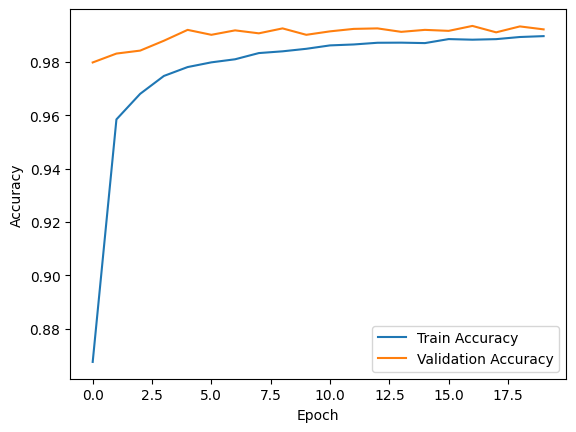

In [15]:
# Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
